#### 引入文件

In [1]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

train_data = unpickle("../dataset/cifar-10-python/cifar-10-batches-py/data_batch_1");
test_data = unpickle("../dataset/cifar-10-python/cifar-10-batches-py/test_batch");

#### 测试数据集

In [2]:
train_data_labels = train_data[b'labels'] #0~9
train_data_pic = train_data[b'data']
print("labels length:",len(train_data_labels))
print("data size:",train_data_pic.shape)

labels length: 10000
data size: (10000, 3072)


In [11]:
#统计测试数据集中各类别出现次数
def get_label_count(labels): 
    unique_data = np.unique(labels)
    for label in unique_data:
        print(label,": ",labels.count(label))
get_label_count(train_data_labels)

0 :  1005
1 :  974
2 :  1032
3 :  1016
4 :  999
5 :  937
6 :  1030
7 :  1001
8 :  1025
9 :  981


#### 测试数据集

In [3]:
test_data_labels = test_data[b'labels'] #0~9
test_data_pic = test_data[b'data']
print("labels length:",len(test_data_labels))
print("data size:",test_data_pic.shape)

labels length: 10000
data size: (10000, 3072)


#### 显示图片

In [4]:
import matplotlib.pyplot as plt
import numpy as np
def draw_cifar10(raw_pic_data): #输入(3072,)的numpy矩阵
    img = raw_pic_data.reshape(3,32,32)
    img = img.transpose(1, 2, 0)  
    plt.imshow(img)

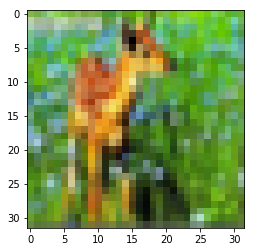

In [8]:
test_raw_img = train_data_pic[1005]
draw_cifar10(test_raw_img)

In [25]:
class KNN_Classfier:
    def __init__(self):
        pass
    def train(self,X,y):
        self.X_train = X
        self.y_train = y
    def predict(self,X):
        num_test = X.shape[0]
        y_pred = np.zeros(num_test, dtype=self.y_train.dtype)
        
        for i in range(num_test):
            distances = np.sum(np.abs(self.X_train - X[i,:]),axis=1)
            min_index = np.argmin(distances) #当前测试的图片与训练集中的图片距离最小的index（k=1,容易过拟合）
            y_pred[i] = self.y_train[min_index]
        return y_pred

### 测试

In [27]:
length = 500
X_train = train_data_pic[0:length]
y_train = np.array(train_data_labels[0:length])
X_test = test_data_pic[0:length]
y_test = test_data_labels[0:length]

In [32]:
my_knn_classifier = KNN_Classfier()
my_knn_classifier.train(X_train, y_train)
y_pred = my_knn_classifier.predict(X_test)

In [39]:
count = 0
for i in range(length):
    if(y_pred[i] == y_test[i]):
        count = count + 1
print("准确率:",count/length)

准确率: 0.18
